<a href="https://colab.research.google.com/github/shashankbhatia15/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [220]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [222]:
#read the data
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/CAPSTONE PROJECTS/NETFLIX MOVIES AND TV SHOWS CLUSTERING - SHASHANK BHATIA/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **DATA OVERVIEW**

In [223]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [224]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [225]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s2285,Movie,Carrie Pilby,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [227]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [228]:
df.shape

(7787, 12)

In [229]:
#types of shows
df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [230]:
#types of ratings
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [231]:
#copying data to preserve orignal file
df1= df.copy()

# **NULL VALUE TREATMENT**

**1. RATING & COUNTRY** - Replacing nulls with mode


**2. CAST**- Replacing nulls with 'unknown'.


**3. DATE** - there are few missing values for date column. so, lets drop missing value rows.

**4. DIRECTOR** -  Director column has more then 30% null values so we will not use it for our model but will keep it for EDA - Replacing nulls with 'unknown'.



In [232]:
#Calculating the percentage of NULL of values in each column
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
director,2389,30.679337
cast,718,9.220496
country,507,6.510851
date_added,10,0.128419
rating,7,0.089893
description,0,0.000000
listed_in,0,0.000000
duration,0,0.000000
release_year,0,0.000000
title,0,0.000000


In [233]:
#Replacing missing values in 'director' column with value 'unknown'
df['director'].replace(np.nan, "unknown",inplace  = True)

#Replacing missing values in 'cast' column with value 'unknown'
df['cast'].replace(np.nan, "unknown",inplace  = True)

#Replacing missing values in 'country' column with mode
df['country']= df['country'].fillna(df['country'].mode()[0])


#Replacing missing values in 'rating' column with value most frequent rating i.e. mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Dropping the null values in 'date_added'
df = df[df['date_added'].notna()]

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


No more null values left

# **EDA**

In [235]:
#check duplicate entries
len(df[df.duplicated()])

0

No duplicates found in the data 

# **TYPE OF CONTENT**

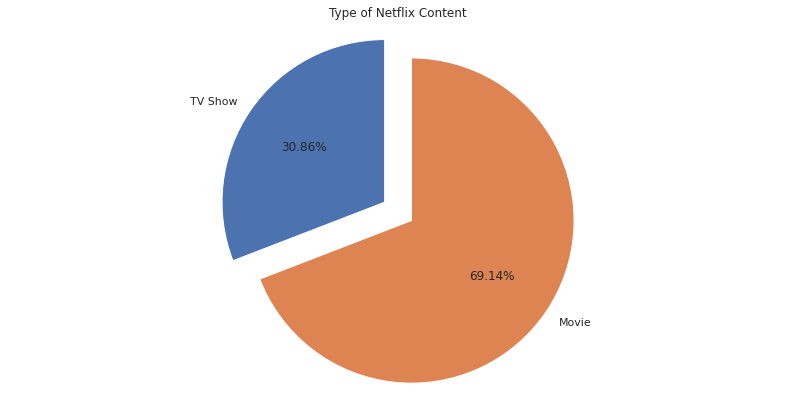

In [236]:
#plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

# **COUNTRY**

In [237]:
for i in range(7782,7783):
  if type(df['country'][i])== str:
    split=df['country'][i].split(',')
    print(split)

['Sweden', ' Czech Republic', ' United Kingdom', ' Denmark', ' Netherlands']


In [238]:
country_list=[]
for k in split:
      country_list.append(k.strip())
country_list

['Sweden', 'Czech Republic', 'United Kingdom', 'Denmark', 'Netherlands']

In [239]:
production_country=list(set([(i,country_list.count(i)) for i in country_list]))

In [240]:
production_country

[('Netherlands', 1),
 ('Czech Republic', 1),
 ('Sweden', 1),
 ('Denmark', 1),
 ('United Kingdom', 1)]

In [241]:
#FEATURE ENGINEERING - Creating a new feature 'main_Country'
df['main_country']= df['country'].apply(lambda x: x.split(",")[0])

In [242]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,main_country
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States


Text(0, 0.5, 'Country Name')

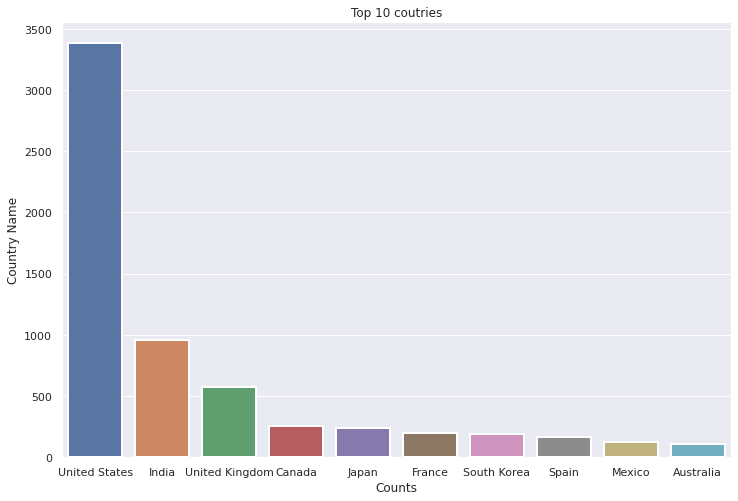

In [243]:
# Top 10 countries on Netflix
plt.figure(figsize=(12,8))
ax=sns.countplot(x='main_country',lw=2,data=df,
              order=df['main_country'].value_counts().index[0:10])

plt.title('Top 10 coutries')
plt.xlabel('Counts')
plt.ylabel('Country Name')

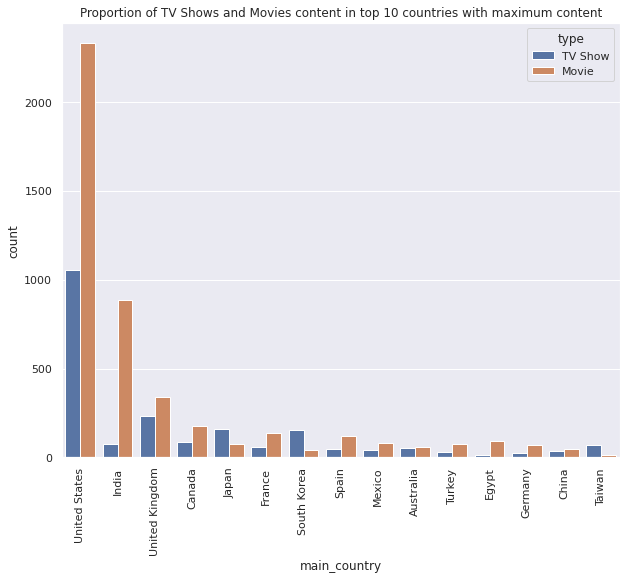

In [244]:
#Proportion of TV Shows and Movies content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(10,8))
ax=sns.countplot(x="main_country",data= df,hue= "type",order = df['main_country'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.title("Proportion of TV Shows and Movies content in top 10 countries with maximum content")
plt.show()

# **TOP 10 DIRECTORS**

In [245]:
#creating copy for plot
direc=df.copy()
direc=direc[df['director']!='unknown']

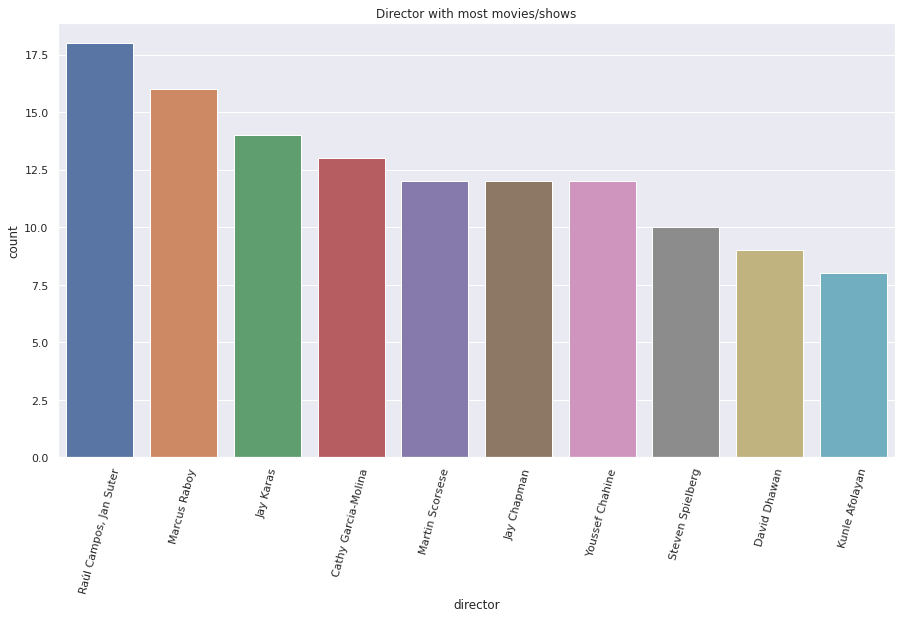

In [246]:
#plot for director

plt.figure(figsize = (15,8))
sns.countplot(x='director',data=direc,order=direc.director.value_counts().head(10).index)
plt.title('Director with most movies/shows')
plt.xticks(rotation = 75)
plt.show()

# **ACTOR**

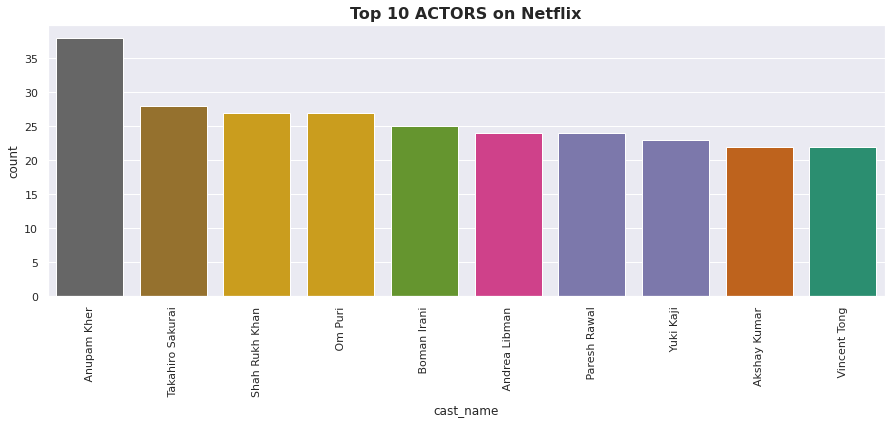

In [247]:
df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2_r")
plt.title("Top 10 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

# **GENRES**

In [248]:
type(df['listed_in'][0])

str

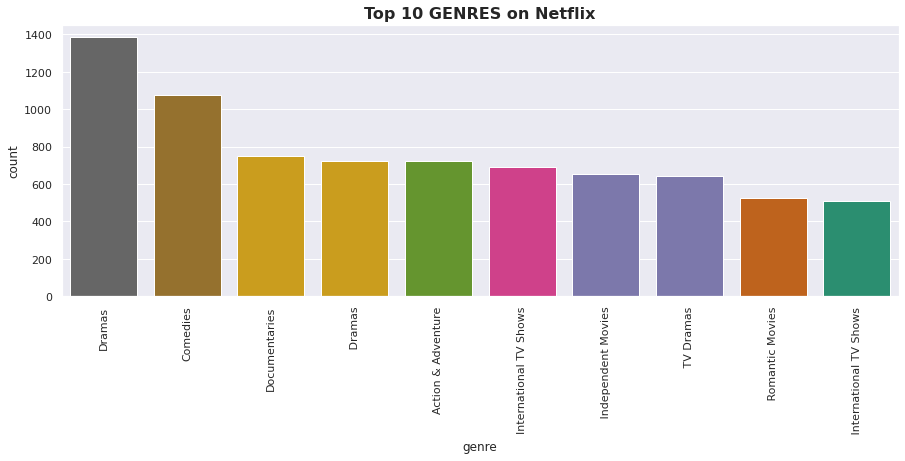

In [249]:
#Top 10 genres overall
df['listed_in'] = df['listed_in'].apply(lambda x :  x.split(',')) 
genre_count = []
for i in df['listed_in']: 
  genre_count += i
    
genre_dict = dict((i, genre_count.count(i)) for i in genre_count)

df_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='genre',y='count',data=df_genre_count,palette="Dark2_r")
plt.title("Top 10 GENRES on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

In [250]:
#Getting Movies and TV show records in seperate dataframes
movies_df= df[df['type']=='Movie']
tvshow_df= df[df['type']=='TV Show']
movies_df.shape

(5377, 14)

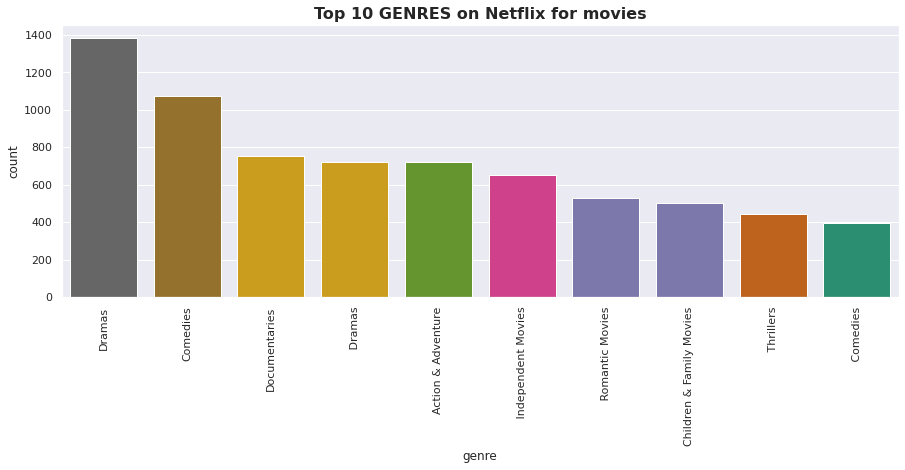

In [251]:
#Top 10 genres
genre_count = []
for i in movies_df['listed_in']: 
  genre_count += i
    
genre_dict = dict((i, genre_count.count(i)) for i in genre_count)

df_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='genre',y='count',data=df_genre_count,palette="Dark2_r")
plt.title("Top 10 GENRES on Netflix for movies",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

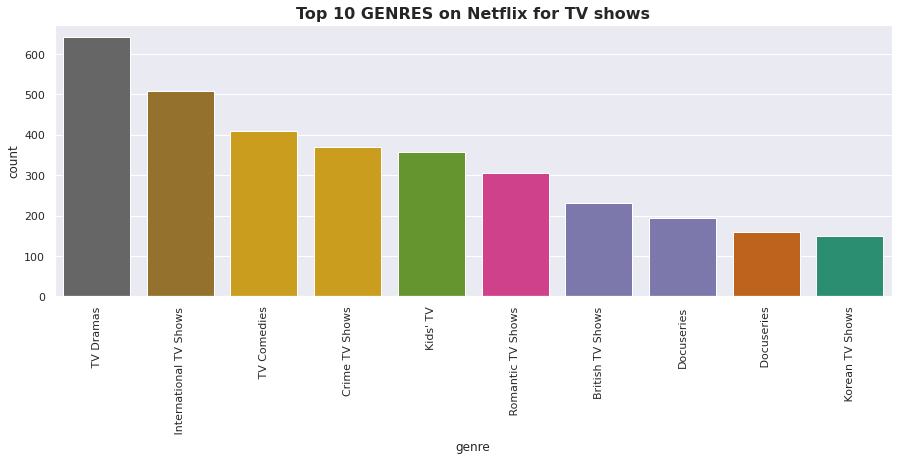

In [252]:
#Top 10 genres
genre_count = []
for i in tvshow_df['listed_in']: 
  genre_count += i
    
genre_dict = dict((i, genre_count.count(i)) for i in genre_count)

df_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='genre',y='count',data=df_genre_count,palette="Dark2_r")
plt.title("Top 10 GENRES on Netflix for TV shows",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

# **YEARS**

In [253]:
#feature engineering
#getting date in the right format and year/month extraction
df ['date_added'] = pd.to_datetime(df['date_added'])
df ['year_added'] = df['date_added'].dt.year
df ['month_added'] = df['date_added'].dt.month

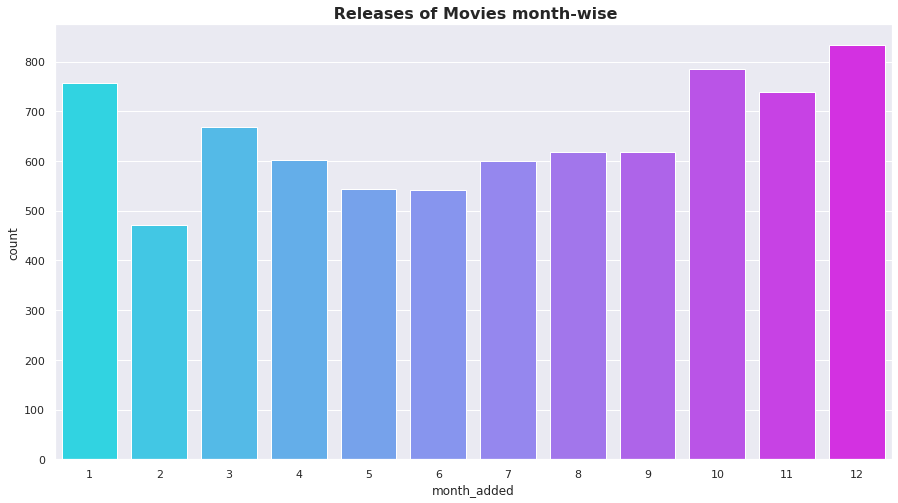

In [254]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x='month_added',data=df,palette="cool")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

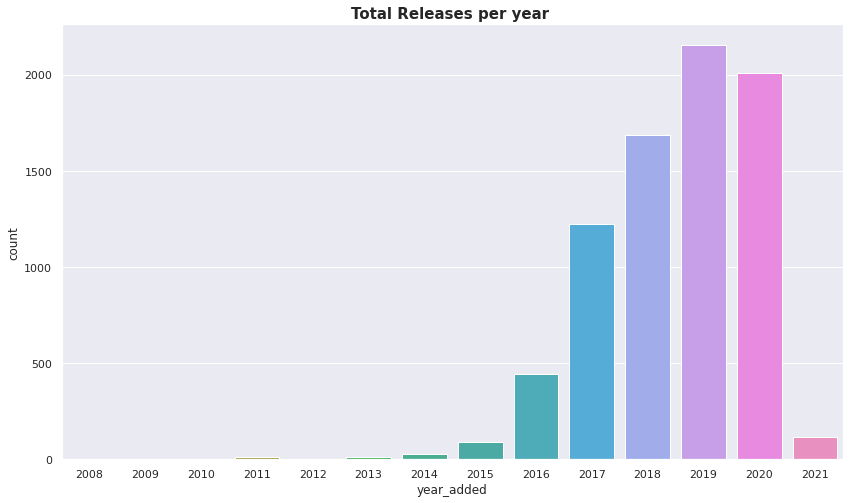

In [255]:

sns.set(rc={'figure.figsize':(14,8)})
sns.countplot(x='year_added',data=df)

plt.title('Total Releases per year ',size='15',fontweight="bold")    
plt.show()

# **HYPOTHESIS TESTING**

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled.

NULL HYPOTHESIS - Number of TV shows on Netflix have trippled and number of movies have reduced by 2000 between 2010 and 2018.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


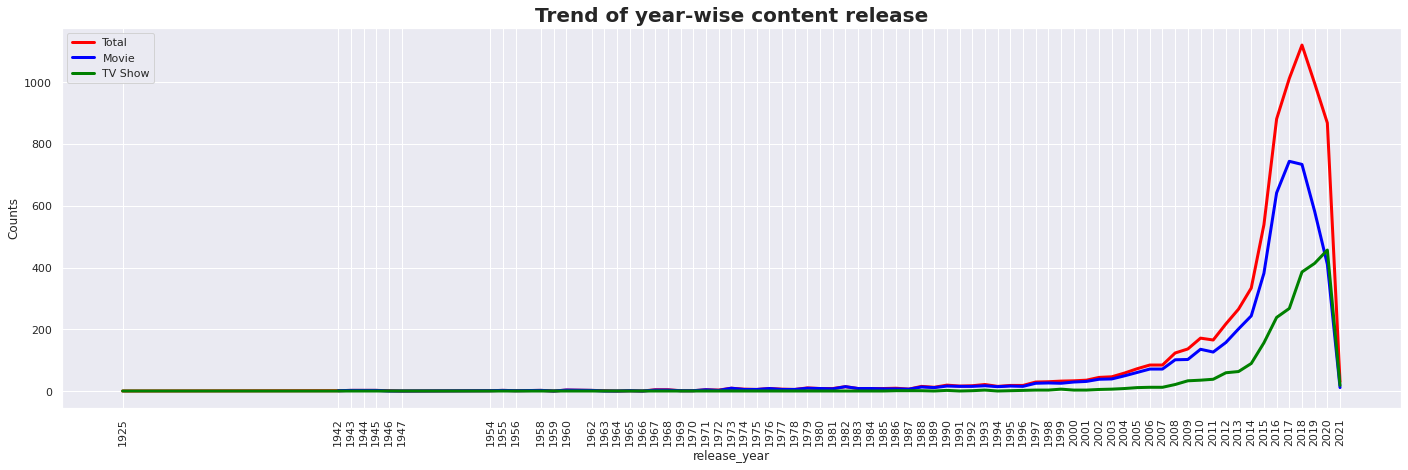

In [256]:
#Visualize the growth of netflix industry over the years

year_data = df['release_year'].value_counts().sort_index().loc[:2021]
type_data = df.groupby('release_year')['type'].value_counts().unstack().loc[:2021]


plt.figure(figsize=(24,7))

sns.lineplot(x=year_data.index,y=year_data, color = 'red', linewidth=3, label='Total')
sns.lineplot(type_data.index, type_data['Movie'], color='blue', linewidth=3, label='Movie')
sns.lineplot(type_data.index, type_data['TV Show'], color='green', linewidth=3, label='TV Show')

plt.xticks(year_data.index.unique())
plt.title("Trend of year-wise content release", weight='bold', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Counts')
plt.legend(loc='upper left')

In [257]:
#Checking the trends from the year 2010
df_2010 = df[df['year_added']>=2010]
df_2k10_18 = df[df['year_added']<=2018]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

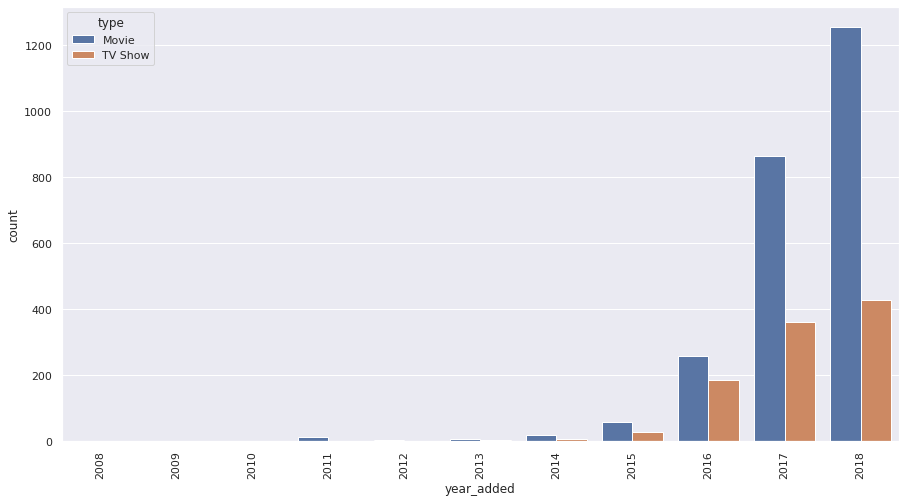

In [258]:
#overall year_added analysis
plt.figure(figsize=(15,8))
sns.countplot(df_2k10_18["year_added"],hue=df_2k10_18["type"])
plt.xticks(rotation = 90)

Irrespective of the release years, Netflix has distribution rights for the most number of shows and movies is in the year 2019. Also, there is no decline in the number of movies.Also number if movies added has always been more than the number of tv shows added.Compared the number of tv shows streamed in the year 2010, there is steady increase in the number of tv shows streamed in the year 2019.

# **CLUSTERING**

In [259]:
#getting orignal data
df=df1.copy()

In [260]:
# Replacing the values where the director is null with appropriate strings
df["cast"] = df["cast"].fillna("")
df["country"] = df["country"].fillna("United States")
df["date_added"] = df["date_added"].fillna("")
df["rating"] = df["rating"].fillna("")

In [261]:
# Change cast, country, and listed_in columns from type str to lists
df.cast = df1.cast.str.split(',').tolist()
df.country = df1.country.str.split(',').tolist()
df.listed_in = df1.listed_in.str.split(',').tolist()

In [262]:
# Array of all cast members, countries, ratings, and genres

all_cast = df['cast'].explode().unique()
all_countries = df['country'].explode().unique()
all_ratings = df['rating'].unique()
all_genres = df['listed_in'].explode().unique()

len(all_cast), len(all_countries), len(all_ratings),len(all_genres)

(35373, 189, 15, 73)

In [263]:
df['combined features'] = df['listed_in'].astype(str) + " " + df['description'].astype(str) + " " + df['type'].astype(str) + " "  + df['rating'].astype(str)

In [264]:
import re

In [265]:
#removing URLs
df['combined features'] = df['combined features'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))
#REMOVING PUNCTUATIONS/NUMBERS/SPECIAL CHARACTERS
df['combined features'] = df['combined features'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))
#lower case
df['combined features'] = df['combined features'].apply(lambda x: x.lower())

REMOVE STOPWORDS

In [273]:
import nltk
from nltk.corpus import stopwords


In [274]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error with downloaded zip file


False

In [266]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [267]:
df['combined features'] = df['combined features'].apply(lambda x: remove_stopwords(x))

NameError: ignored

**REMOVING SHORT WORDS**

In [ ]:
#Removing words with than 3 letters
df['combined features'] = df['combined features'].apply(lambda x: (w for w in x if len(w)>3))

**STEMMING**

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
#function for stemming
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [ ]:
df['combined features'] = df['combined features'].apply(lambda x: stemming(x))